In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Histogram as the first view of our data

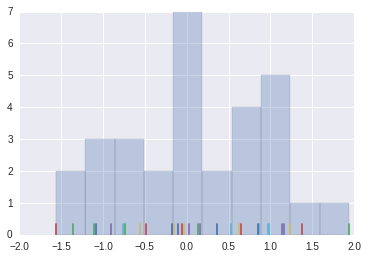

In [2]:
data = randn(30)
plt.hist(data, alpha=.3)
sns.rugplot(data)
plt.show()

# Mixture of Probability Kernels to generate the Density Estimation using different Bandiwidth

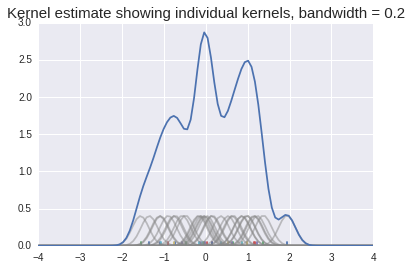

In [3]:
import matplotlib
    #Draw the rug and set up the x-axis space
sns.rugplot(data);
xx = np.linspace(-4, 4, 100)

# Compute the bandwidth of the kernel using a rule-of-thumb
#bandwidth = ((4 * data.std() ** 5) / (3 * len(data))) ** .2
#bandwidth = len(data) ** (-1. / 5)
bandwidth  = 0.2
# We'll save the basis functions for the next step
kernels = []

# Plot each basis function
for d in data:

    # Make the basis function as a gaussian PDF
    kernel = stats.norm(d, bandwidth).pdf(xx)
    kernels.append(kernel)

    # Scale for plotting
    kernel /= kernel.max()
    kernel *= .4
    plt.plot(xx, kernel, "#888888", alpha=.5)
scipy_kde = stats.gaussian_kde(data)(xx)
summed_kde = np.sum(kernels, axis=0)
plt.title('Kernel estimate showing individual kernels, bandwidth = '+str(bandwidth),fontsize=15)
plt.plot(xx, summed_kde)
#plt.show()
matplotlib.pylab.savefig('foo12.jpeg',dpi=300)

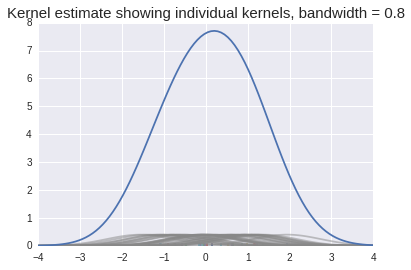

In [4]:
sns.rugplot(data);
xx = np.linspace(-4, 4, 100)

# Compute the bandwidth of the kernel using a rule-of-thumb
#bandwidth = ((4 * data.std() ** 5) / (3 * len(data))) ** .2
#bandwidth = len(data) ** (-1. / 5)
bandwidth  = 0.8
# We'll save the basis functions for the next step
kernels = []

# Plot each basis function
for d in data:

    # Make the basis function as a gaussian PDF
    kernel = stats.norm(d, bandwidth).pdf(xx)
    kernels.append(kernel)

    # Scale for plotting
    kernel /= kernel.max()
    kernel *= .4
    plt.plot(xx, kernel, "#888888", alpha=.5)
scipy_kde = stats.gaussian_kde(data)(xx)
summed_kde = np.sum(kernels, axis=0)
plt.title('Kernel estimate showing individual kernels, bandwidth = '+str(bandwidth),fontsize=15)
plt.plot(xx, summed_kde)
#plt.show()
matplotlib.pylab.savefig('foo119.jpeg', dpi=300)

# Plotting Density Estimation Using Different Kernels 

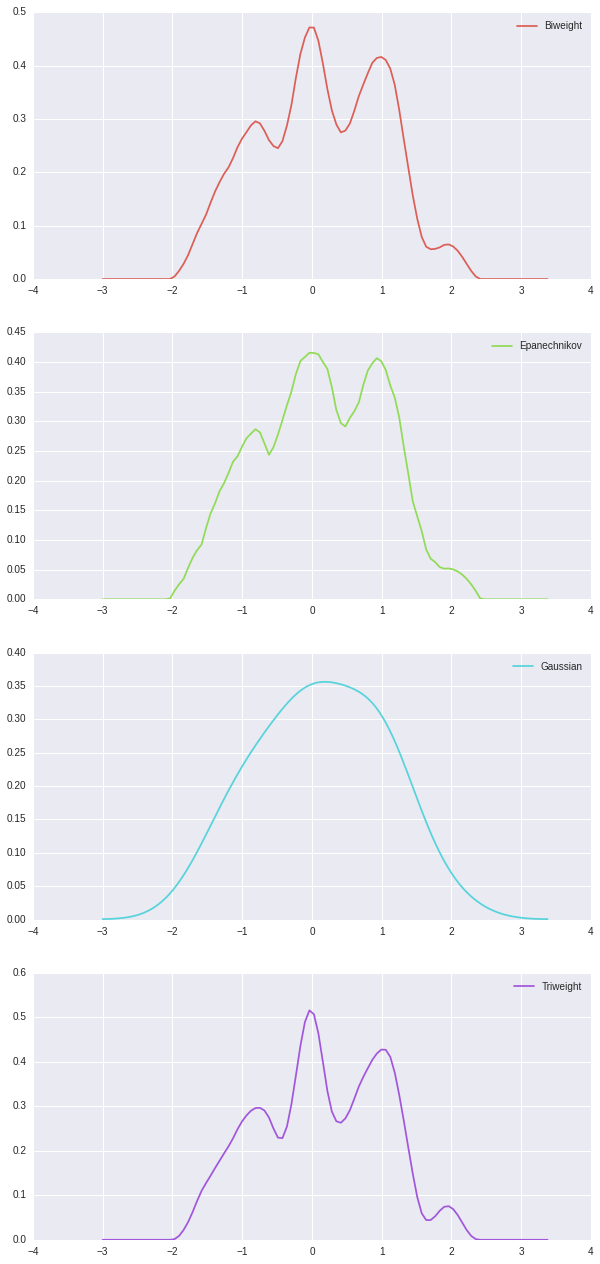

In [5]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(10, 22))
subfigs = [ax1,ax2,ax3,ax4]
kernels = ["biw", "epa", "gau", "triw"]
labels=["Biweight", "Epanechnikov", "Gaussian", "Triweight"]
pal = sns.color_palette("hls", len(kernels))
for k, c, d, p in zip(kernels, pal, labels, subfigs):
    sns.kdeplot(data, kernel=k, color=c, label=d, ax=p)
plt.legend();
matplotlib.pylab.savefig('kernelFunctionss.jpeg',dpi=300)